In [55]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree






In [56]:
data = pd.read_csv('output/loan_dev.csv')
data

,Id,loan_date,loan_duration,loan_payments,Predicted,account_district_code,account_frequency,account_date,account_district_region,account_district_no_inhabitants,...,last_trans_balance,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_signed,owner_male,owner_birthdate,disponent_male,disponent_birthdate
0,5314,930705,12,8033,1.0,30,1,930322,7,94812,...,20100.0,12250.000000,5025.000000,5025.000000,NaN,5025.000000,0,470722,NaN,NaN
1,5316,930711,36,4610,0.0,46,2,930213,3,112709,...,52208.9,52083.859459,11015.635135,13523.158824,8884.240000,1411.051351,1,680722,NaN,NaN
2,6863,930728,60,2118,0.0,45,2,930208,3,77917,...,20272.8,30060.954167,5417.458333,5009.733333,6097.000000,844.708333,1,360602,NaN,NaN
3,5325,930803,36,2939,0.0,12,2,930130,2,107870,...,34307.3,41297.480000,8253.080000,9254.600000,7168.100000,1371.704000,0,400420,NaN,NaN
4,7240,930906,60,4579,0.0,1,1,930214,4,1204953,...,41112.9,57188.211111,18945.966667,21255.930769,16801.000000,1522.707407,1,780907,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,961212,48,3242,0.0,72,2,950121,1,226122,...,60694.1,44197.509884,4895.974419,6448.582857,3830.458824,352.872093,0,710410,1.0,790610.0
324,5625,961215,60,3703,1.0,29,2,951129,7,45714,...,59578.8,55230.444068,11725.494915,13417.557143,10197.180645,1009.813559,1,390320,NaN,NaN
325,6805,961221,48,938,0.0,70,2,960521,1,285387,...,38384.3,41994.907692,7779.815385,8544.930000,6974.431579,984.215385,0,570504,NaN,NaN
326,7233,961225,36,3217,0.0,16,2,950520,6,93931,...,41878.1,56646.516129,13280.084677,16554.986275,10992.139726,337.726613,1,530601,NaN,NaN


In [57]:
with_nulls = []
for i in data.isna().any().iteritems():
    if i[1]:
        with_nulls.append(i[0])
        print(i[0])

account_district_unemployment_rate_95
account_district_no_crimes_95
owner_card_issued
owner_district_unemployment_rate_95
owner_district_no_crimes_95
disponent_district_code
disponent_district_region
disponent_district_no_inhabitants
disponent_district_no_municipalities_0_499
disponent_district_no_municipalities_500_1999
disponent_district_no_municipalities_2000_9999
disponent_district_no_municipalities_10000_plus
disponent_district_no_cities
disponent_district_ratio_urban_inhabitants
disponent_district_average_salary
disponent_district_unemployment_rate_95
disponent_district_unemployment_rate_96
disponent_district_no_enterpreneurs_per_1000_inhabitants
disponent_district_no_crimes_95
disponent_district_no_crimes_96
mean_trans_amount_withdrawal
disponent_male
disponent_birthdate


# Cols with NaN values

owner_card_issued
disponent_district
disponent_card_issued
mean_trans_amount_withdrawal
disponent_male
disponent_birthdate

In [58]:
inputs = data.drop(with_nulls, axis=1)

inputs.sort_values(by=['loan_date'])
inputs

,Id,loan_date,loan_duration,loan_payments,Predicted,account_district_code,account_frequency,account_date,account_district_region,account_district_no_inhabitants,...,count_trans_ksymbol_insurance_payment,count_trans_ksymbol_sanction_interest_if_negative_balance,count_trans_ksymbol_oldage_pension,last_trans_balance,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_signed,owner_male,owner_birthdate
0,5314,930705,12,8033,1.0,30,1,930322,7,94812,...,0,0,0,20100.0,12250.000000,5025.000000,5025.000000,5025.000000,0,470722
1,5316,930711,36,4610,0.0,46,2,930213,3,112709,...,0,0,0,52208.9,52083.859459,11015.635135,13523.158824,1411.051351,1,680722
2,6863,930728,60,2118,0.0,45,2,930208,3,77917,...,0,0,0,20272.8,30060.954167,5417.458333,5009.733333,844.708333,1,360602
3,5325,930803,36,2939,0.0,12,2,930130,2,107870,...,0,0,0,34307.3,41297.480000,8253.080000,9254.600000,1371.704000,0,400420
4,7240,930906,60,4579,0.0,1,1,930214,4,1204953,...,0,0,0,41112.9,57188.211111,18945.966667,21255.930769,1522.707407,1,780907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,961212,48,3242,0.0,72,2,950121,1,226122,...,0,0,0,60694.1,44197.509884,4895.974419,6448.582857,352.872093,0,710410
324,5625,961215,60,3703,1.0,29,2,951129,7,45714,...,0,0,0,59578.8,55230.444068,11725.494915,13417.557143,1009.813559,1,390320
325,6805,961221,48,938,0.0,70,2,960521,1,285387,...,0,0,0,38384.3,41994.907692,7779.815385,8544.930000,984.215385,0,570504
326,7233,961225,36,3217,0.0,16,2,950520,6,93931,...,0,0,0,41878.1,56646.516129,13280.084677,16554.986275,337.726613,1,530601


In [89]:
Y = inputs["Predicted"].values
X = inputs.drop(["Predicted", "Id", "account_district_code", "owner_district_code", "loan_date"], axis=1).values

In [90]:

estimator = DecisionTreeClassifier(splitter='best', min_samples_split=6, min_samples_leaf=5, max_features='sqrt', max_depth=41, criterion='gini')
selector = RFECV(estimator, cv=TimeSeriesSplit(), scoring='roc_auc')
selector.fit(X, Y)


RFECV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
      estimator=DecisionTreeClassifier(max_depth=41, max_features='sqrt',
                                       min_samples_leaf=5,
                                       min_samples_split=6),
      scoring='roc_auc')

C:\Users\PedroGoncaloCorreia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


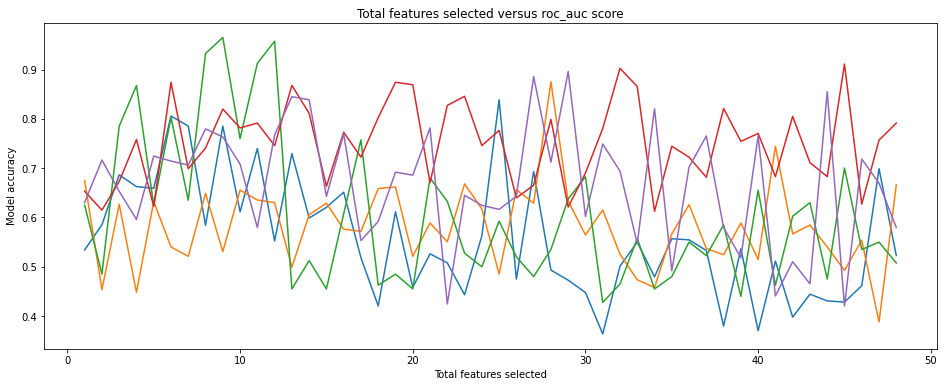

In [91]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus roc_auc score')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [92]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': selector.support_[i], 'ranking': selector.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)


C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_15160\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_15160\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_15160\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\PedroGoncaloCorreia\AppData\Local\Temp\ipykernel_15160\1288347173.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

,feature,support,ranking
45,45,True,1
44,44,True,1
43,43,True,1
42,42,True,1
41,41,True,1
39,39,True,1
27,27,True,1
35,35,True,1
18,18,True,1
46,46,False,2


In [93]:
selected_features = selector.get_support(1)
selected_features

array([18, 27, 35, 39, 41, 42, 43, 44, 45], dtype=int64)

In [94]:
new_inputs = inputs[inputs.columns[selected_features]]
new_inputs.columns

Index(['account_district_no_enterpreneurs_per_1000_inhabitants',
       'owner_district_no_municipalities_10000_plus',
       'count_trans_withdrawals', 'count_trans_collection_other_bank',
       'count_trans_ksymbol_interest_credited',
       'count_trans_ksymbol_household',
       'count_trans_ksymbol_payment_for_statement',
       'count_trans_ksymbol_insurance_payment',
       'count_trans_ksymbol_sanction_interest_if_negative_balance'],
      dtype='object')